In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from dg_wave_with_coord_trans_new import *
%matplotlib inline

In [2]:
x_p_0 = 0.
speed_limit = 0.3
def x_p(t):
    return x_p_0 + speed_limit*np.sin(t)
def y_to_x(y,t):
    return y + speed_limit*np.sin(t)
def x_p_dot(t):
    return speed_limit*np.cos(t)
def x_p_dot_dot(t):
    return -speed_limit*np.sin(t)
def analytical_u(x,t):
#     return np.cos(x+x_p(t)-t)+1/2*np.sin(x+x_p(t)+t)
    return np.sin(x+x_p(t)-t)
def analytical_p(x,xp,t):
#     return np.sin(x-t)+1/2*np.cos(x+t)
    return -np.cos(x-t)
def analytical_q(x,xp,t):
#     return -np.sin(x-t) +1/2*np.cos(x+t)
    return np.cos(x-t)

N = 8
K = 8
CF = 2.**(-7)
start = -2.*np.pi
end = 2.*np.pi
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K

reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h

In [3]:
y = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(y)
dt = CF*dx_min
print(dt)

0.000615077236711857


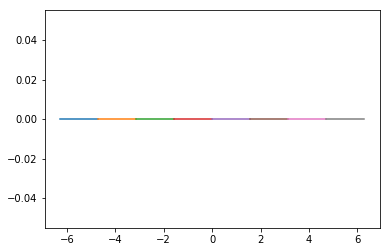

In [4]:
def potential(x,sigma,x0):
    #return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-x0)**2/(2*sigma**2))
    return 0*x
sigma = 0.2
x_center = -np.pi/2
potential_term = potential(y,sigma,x_center)
for i in range(len(y)):
    plt.plot(y[i],potential_term[i])

In [5]:
xp = 0
for i in range(len(y)):
        if np.round(y[i][-1],6) == np.round(xp,6):
            k_xp = i
            break
print(i)
def source_minus_A(t):
#     return -np.cos(xp-t) - np.sin(xp+t)
    return t*0
def source_D_dot(t):
#    return  np.cos(xp-t) - np.sin(xp+t)
    return t*0
def sourceJ1(t):
    return t*0
def sourceJ2(t):
    return t*0

3


In [6]:
t = 0.
t_target = np.pi/4
nt = int((t_target-t)/dt)
u = analytical_u(y,t)
p = analytical_p(y,xp,t)
q = analytical_q(y,xp,t)
# q = x*0
# p = x*0
# u = x*0
print (nt)

1276


In [7]:
# plt.plot(y.flatten(), u.flatten(), label = 'u')
# plt.plot(y.flatten(), p.flatten(), label = 'p')
# plt.plot(y.flatten(), q.flatten(), label = 'q')
# plt.legend()
# plt.ylim(-1.5,1.5)

In [8]:
# dq = dq_dt(q,u,p,K, N,t,M_inv,M_inv_S,False,sourceJ1,sourceJ2,k_xp,potential_term,x_p, x_p_dot, x_p_dot_dot)
# dp = dp_dt(p,u,q,K, N,t,M_inv,M_inv_S,False,sourceJ1,sourceJ2,k_xp,potential_term,x_p, x_p_dot, x_p_dot_dot)
# for i in range(len(y)):
#     plt.plot(y[i],dq[i])
# plt.plot()

In [9]:
# for i in range(len(y)):
#     plt.plot(y[i],dp[i])


In [10]:
# direc = "results_week5_1_ana_4"
# if os.path.isdir(direc):
#     print('Directory'+direc+'already exists')
# else:
#     os.makedirs(direc)
# images = []

In [11]:
for i in range(nt):
    un = u.copy()
    pn = p.copy()
    qn = q.copy()
    u = RK4_Step(dt, du_dt,un,pn,qn,K,N,t,M_inv,M_inv_S,False  ,sourceJ1, sourceJ2,k_xp,potential_term,x_p,x_p_dot,x_p_dot_dot)
    p = RK4_Step(dt, dp_dt,pn,un,qn,K,N,t,M_inv,M_inv_S,False  ,sourceJ1, sourceJ2,k_xp,potential_term,x_p,x_p_dot,x_p_dot_dot)
    q = RK4_Step(dt, dq_dt,qn,un,pn,K,N,t,M_inv,M_inv_S,False  ,sourceJ1, sourceJ2,k_xp,potential_term,x_p,x_p_dot,x_p_dot_dot)
    t += dt
#     if i%(nt//100)==0:
#         plt.figure(figsize=(11, 7), dpi=100)
#         x_ = y_to_x(y,t)
#         for i in range(len(u)):
#             plt.plot(y[i]+x_p(t), u[i])
#         u_ana = analytical_u(y,t)
#         plt.plot(y.flatten(),u_ana.flatten(), ls = '--',color= 'black')
#         plt.xlim(-7,7)
#         plt.ylim(-2,2)
#         plt.title(str(np.round(t,3)))
#         name = direc+"/figure"+str(np.round(t,3))+'.png'
#         plt.savefig(name)
#         images.append(imageio.imread(name))
#         plt.close()
# gifName = direc+'/movie.gif'
# imageio.mimsave(gifName,images)
print(t)

0.7848385540443136


1.1327622912979083

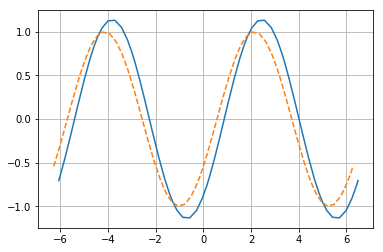

In [12]:
plt.plot((y+x_p(t)).flatten(), u.flatten(), label = 'u')
u_ana = analytical_u(y,t)
plt.plot(y.flatten(),u_ana.flatten(), ls = '--')
plt.grid(True)

# plt.plot(y.flatten(), p.flatten(), label = 'p')
# plt.plot(y.flatten(), q.flatten(), label = 'q')
# p_ana =  analytical_p(y,xp,t)
# q_ana =  analytical_q(y,xp,t)
# plt.plot(y.flatten(),p_ana.flatten(),linestyle='--')
# plt.plot(y.flatten(),q_ana.flatten(),linestyle='--')
# plt.legend()
# plt.ylim(-1.5,1.5)
np.max(u)

0.17146285173886056


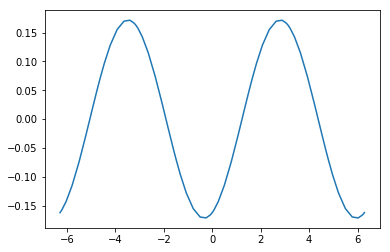

In [13]:
error = u-u_ana
plt.plot(y.flatten(),error.flatten())
print(np.max(error))

In [14]:
# error_p = np.log10(np.abs((p-p_ana)/p_ana)).flatten()
# plt.plot(y.flatten(),error_p,)
# error_q = np.log10(np.abs((q-q_ana)/q_ana)).flatten()
# plt.plot(y.flatten(),error_q)

In [15]:
# dq = dq_dt(q,u,p,K, N,t,M_inv,M_inv_S,False,sourceJ1,sourceJ2,k_xp,potential_term,x_p, x_p_dot, x_p_dot_dot)
# dp = dp_dt(p,u,q,K, N,t,M_inv,M_inv_S,False,sourceJ1,sourceJ2,k_xp,potential_term,x_p, x_p_dot, x_p_dot_dot)
# for i in range(len(y)):
#     plt.plot(y[i],dp[i])
# #plt.ylim(-5,5)

In [16]:
# for i in range(len(y)):
#     plt.plot(y[i],dq[i])
# #plt.ylim(-5,5)

In [17]:
x_p_dot_dot(t)

-0.2120132900757233